In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from statsmodels.formula.api import ols
import statsmodels.api as sm
warnings.filterwarnings('ignore')


In [84]:
X_stance = pd.Series([1, 1, -1, 1, -1, 1, -1, -1], name='Stance')      
X_focus = pd.Series([-1, 1, -1, -1, -1, 1, 1, 1], name='Focus')  
X_hand = pd.Series([-1, 1, -1, 1, -1, 1, -1, 1], name='Hand_Placement')            
Y = pd.Series([30, 50, 50, 50, 30, 40, 50, 20], name='Accuracy')                 

DF = pd.concat([X_stance, X_focus, X_hand, Y], axis='columns')
DF

,Stance,Focus,Hand_Placement,Accuracy
0,1,-1,-1,30
1,1,1,1,50
2,-1,-1,-1,50
3,1,-1,1,50
4,-1,-1,-1,30
5,1,1,1,40
6,-1,1,-1,50
7,-1,1,1,20


In [85]:
model=ols('Accuracy~Stance*Focus+Stance*Hand_Placement+Focus*Hand_Placement',data=DF)
results1=model.fit()  
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     1.200
Date:                Thu, 17 Apr 2025   Prob (F-statistic):              0.513
Time:                        18:11:10   Log-Likelihood:                -25.120
No. Observations:                   8   AIC:                             62.24
Df Residuals:                       2   BIC:                             62.72
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                29.37

In [86]:
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF).fit()
results2=model.summary2()
print(results2)

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.619 
Dependent Variable: Accuracy         AIC:                68.7058
Date:               2025-04-17 18:11 BIC:                69.0236
No. Observations:   8                Log-Likelihood:     -30.353
Df Model:           3                F-statistic:        0.1081 
Df Residuals:       4                Prob (F-statistic): 0.951  
R-squared:          0.075            Scale:              231.25 
----------------------------------------------------------------
                 Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------
Intercept       40.0000   5.3765  7.4398 0.0017  25.0726 54.9274
Stance           3.7500   6.5848  0.5695 0.5995 -14.5323 22.0323
Focus            1.2500   6.5848  0.1898 0.8587 -17.0323 19.5323
Hand_Placement  -2.5000   7.6035 -0.3288 0.7588 -23.6106 18.6106
------------------------------------------

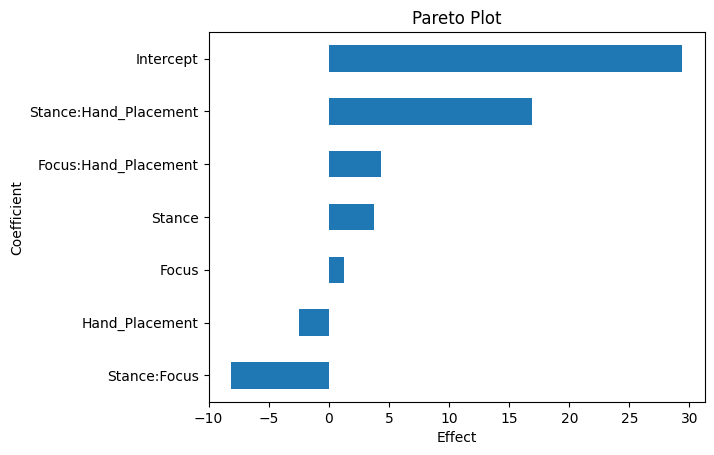

In [87]:
plt.clf()
ordered_coefficients = results1.params
ordered_coefficients=ordered_coefficients.sort_values(axis=0, ascending=True)
ordered_coefficients.plot.barh()
plt.title('Pareto Plot')
plt.xlabel('Effect')
plt.ylabel('Coefficient')
plt.show()

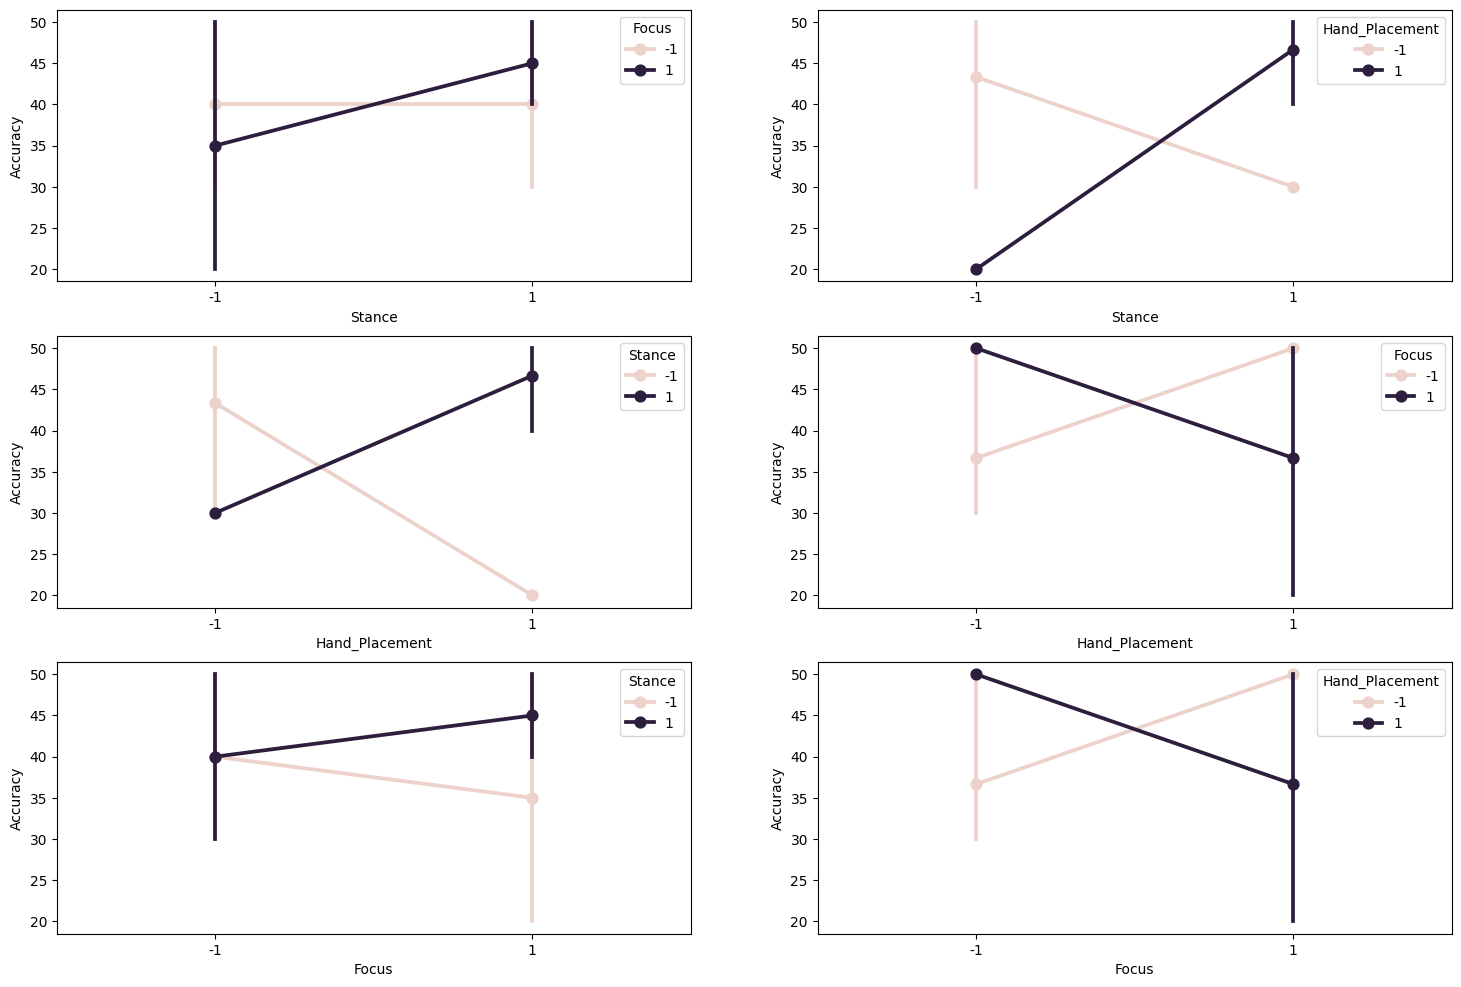

In [88]:
#interaction plots
fig, ax =plt.subplots(3,2)
fig.set_size_inches(18, 12)
sns.pointplot(x='Stance',y='Accuracy',hue='Focus',data=DF,ax=ax[0,0])
sns.pointplot(x='Stance',y='Accuracy',hue='Hand_Placement',data=DF,ax=ax[0,1])
sns.pointplot(x='Hand_Placement',y='Accuracy',hue='Stance',data=DF,ax=ax[1,0])
sns.pointplot(x='Hand_Placement',y='Accuracy',hue='Focus',data=DF,ax=ax[1,1])
sns.pointplot(x='Focus',y='Accuracy',hue='Stance',data=DF,ax=ax[2,0])
sns.pointplot(x='Focus',y='Accuracy',hue='Hand_Placement',data=DF,ax=ax[2,1])
plt.show()

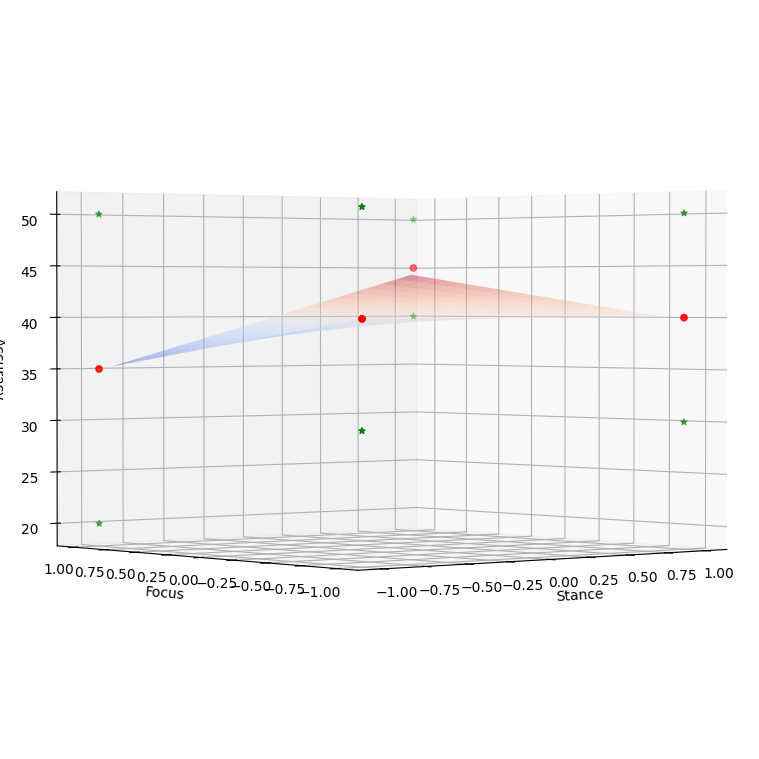

In [89]:
# Contour plot for data between Stance and Focus 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Stance']
y=df['Focus']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})

model3=ols('Accuracy~Stance*Focus',data=DF)
results3=model3.fit()

zS=results3.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results3.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Stance")
ax.set_ylabel("Focus")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()

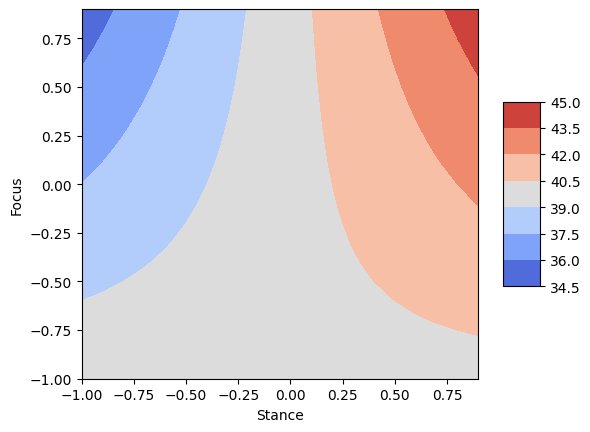

In [90]:
fig=plt.figure()
ax=fig.add_subplot(111)
ContourResults3=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(ContourResults3,shrink=0.5, aspect=5)
ax.set_xlabel("Stance")
ax.set_ylabel("Focus")
plt.show()

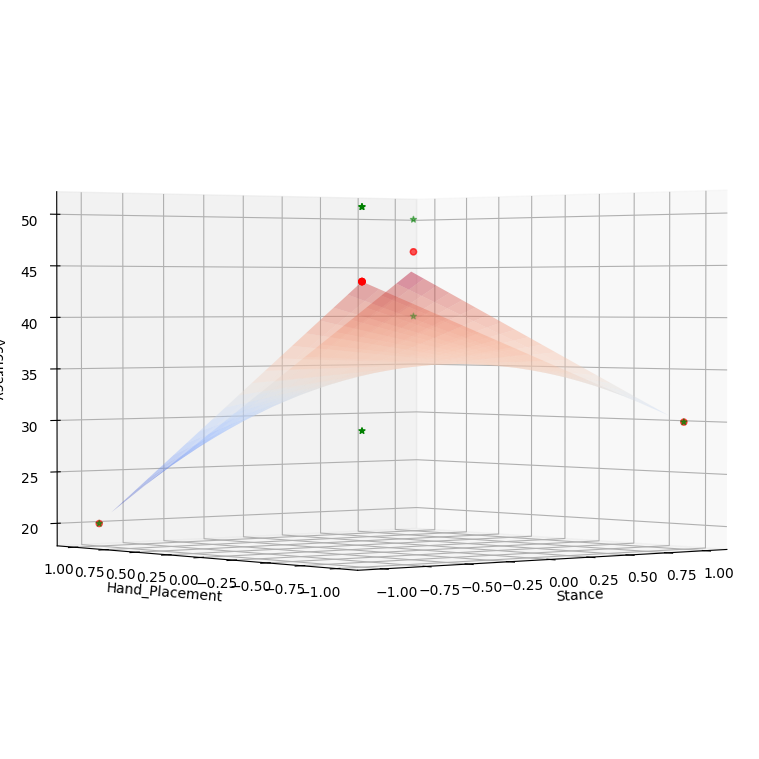

In [91]:
# Contour plot for data between Stance and Hand Placement 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Stance']
y=df['Hand_Placement']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x1: xS.ravel(), x3:yS.ravel()})

model4=ols('Accuracy~Stance*Hand_Placement',data=DF)
results4=model4.fit()

zS=results4.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results4.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Stance")
ax.set_ylabel("Hand_Placement")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()

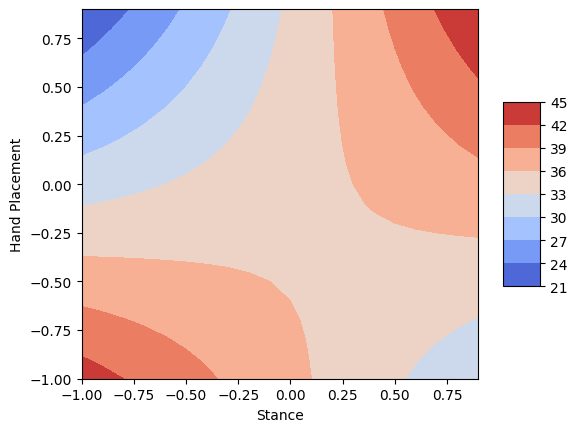

In [92]:
fig=plt.figure()
ax=fig.add_subplot(111)
CountourResults4=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourResults4,shrink=0.5, aspect=5)
ax.set_xlabel("Stance")
ax.set_ylabel("Hand Placement")
plt.show()

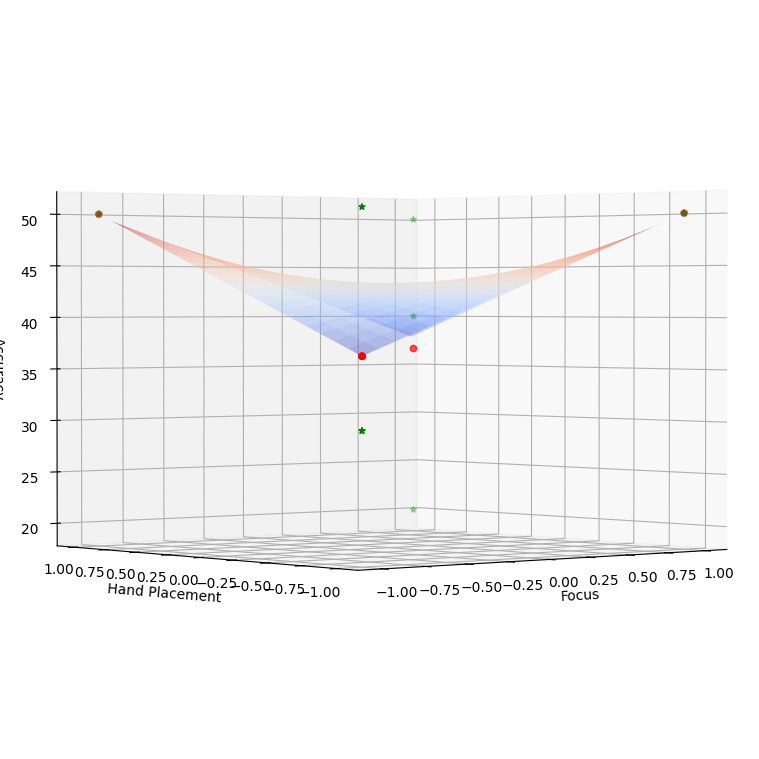

In [93]:
# Contour plot for data between Focus and Hand Placement 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Focus']
y=df['Hand_Placement']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x2: xS.ravel(), x3:yS.ravel()})

model5=ols('Accuracy~Focus*Hand_Placement',data=DF)
results5=model5.fit()

zS=results5.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results5.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Focus")
ax.set_ylabel("Hand Placement")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()

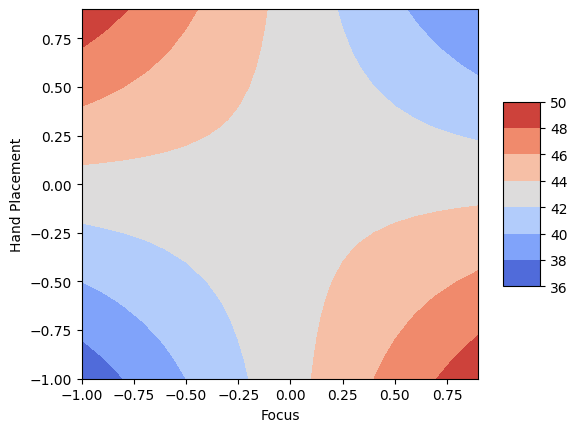

In [94]:
fig=plt.figure()
ax=fig.add_subplot(111)
CountourResults5=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourResults5,shrink=0.5, aspect=5)
ax.set_xlabel("Focus")
ax.set_ylabel("Hand Placement")
plt.show()
